In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('Desktop/sp_financials.csv')

In [24]:
data = data.drop(['SEC_Filings', 'Sector', 'Name'], axis=1)

In [25]:
data = data.set_index('Symbol')

In [26]:
data = data.fillna(0)

In [27]:
features = data[['Price', 'Price/Earnings', 'Dividend_Yield', 'Earnings/Share',
       '52_Week_Low', '52_Week_High', 'Market_Cap', 'EBITDA', 'Price/Sales',
       'Price/Book']]

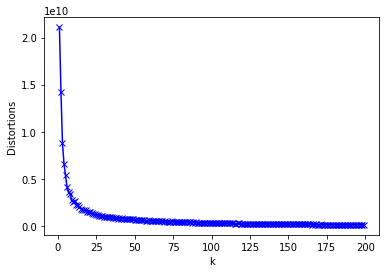

In [52]:
distortions = []
K = range(1,200)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(features)
    distance = cdist(features[0:200], model.cluster_centers_, 'euclidean')
    close = np.min(distance, axis=1)
    dist = sum(close)/features.shape[0]
    distortions.append(dist)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.show()


In [53]:
from scipy.interpolate import UnivariateSpline

print(len(K))
print(len(distortions))
bet = UnivariateSpline(K,distortions,s=0,k=4)


sd = bet.derivative(n=2)

199
199


[-6.04446312e+09  1.86183808e+09  3.76976290e+09  7.87223144e+08
 -3.53541685e+08  1.06929371e+09  2.25977698e+08 -6.39051013e+08
  6.67553564e+08  2.40622846e+08 -6.22397992e+08  5.70989719e+08
 -3.93423393e+08  2.33928237e+08 -2.01298883e+07  2.68989729e+07
  1.00908736e+08 -2.51138979e+08  2.88509314e+08 -1.25901768e+08
  1.80563203e+07 -8.58862792e+07  1.70528924e+08 -1.53594076e+08
  1.67069279e+08 -1.86293984e+08  1.66457140e+08 -2.74910187e+07
 -1.15176217e+08  1.00571893e+08 -3.61124564e+07  1.38403039e+08
 -2.02092278e+08  1.70465630e+08 -1.10295933e+08  1.04191460e+07
  5.47308229e+07 -1.05017323e+08  1.68700168e+08 -1.99047669e+08
  2.71942352e+08 -2.40782121e+08  7.30924845e+07 -2.26859151e+06
  9.76157168e+07 -2.04952984e+08  1.88823441e+08 -8.97922993e+07
 -6.54894726e+06  3.66167734e+07  1.58705075e+07 -1.13944829e+08
  1.75186414e+08 -1.27376896e+08  3.61286965e+07  1.16356195e+07
 -3.42631167e+07  1.17281917e+08 -1.54889054e+08  2.52928565e+07
  1.10607854e+08 -1.07378

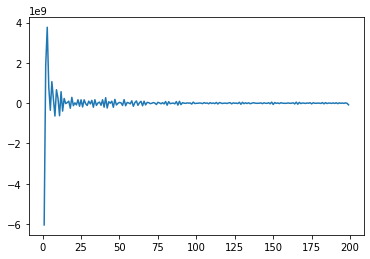

In [61]:
plt.plot(K,sd(K))
print(sd(K))
